# <b>Proyecto de Evaluación: Machine Learning (Clasificación)</b>
---

## Parte 1: Carga y Exploración del dataset.
---

In [151]:

# Importamos la librería pandas, que permite manejar y analizar datos en forma de tablas
import pandas as pd

# Cargamos el dataset desde el archivo CSV
df = pd.read_csv("data/heart_disease_uci.csv")

# Mostramos las primeras 5 filas para hacernos una idea de cómo vienen los datos
print("----------------------------------------------")
print("Primeras filas del dataset:")
display(df.head())
print("----------------------------------------------")

# Mostramos un resumen de información:
# número de filas y columnas, tipo de datos por columna, y si hay valores nulos
print("\nResumen de información del dataset:")
df.info()
print("----------------------------------------------")

# Estadísticas para cada columna numérica: media, desviación, percentiles, etc.
print("\nEstadísticas descriptivas:")
display(df.describe())
print("----------------------------------------------")

# Contamos cuántos valores únicos hay por columna, para detectar variables categóricas
print("\nCantidad de valores únicos por columna:")
display(df.nunique())
print("----------------------------------------------")

# Mostramos la distribución original de la variable 'num'
# Esto refleja distintos niveles de enfermedad cardíaca (0 a 4)
print("Distribución original de la variable 'num' (grados de enfermedad):")
print(df['num'].value_counts())
print("----------------------------------------------")

# Creamos la variable binaria 'target' a partir de 'num'
# Si 'num' es mayor que 0, consideramos que hay enfermedad cardíaca (1)
# Si es igual a 0, consideramos que no la hay (0)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Eliminamos 'num' porque ya está representada en 'target' como una variable binaria
# Además, mantenerla provocaría fuga de información (data leakage) durante el entrenamiento
df.drop(columns=['num'], inplace=True)

# Mostramos la nueva distribución binaria
print("\nDistribución binaria en 'target' (0 = sano, 1 = enfermo):")
print(df['target'].value_counts())
print("----------------------------------------------")


----------------------------------------------
Primeras filas del dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


----------------------------------------------

Resumen de información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
---------------------------------------------

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


----------------------------------------------

Cantidad de valores únicos por columna:


id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

----------------------------------------------
Distribución original de la variable 'num' (grados de enfermedad):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64
----------------------------------------------

Distribución binaria en 'target' (0 = sano, 1 = enfermo):
target
1    509
0    411
Name: count, dtype: int64
----------------------------------------------


---

<b>Conclusiones:</b>   <br>

Tras revisar el dataset, observamos lo siguiente:

- El conjunto de datos contiene **920 registros** y **16 columnas**, con información clínica relevante como edad, tipo de dolor torácico, presión arterial, colesterol, etc.
- Existen valores nulos en varias columnas, especialmente en `ca`, `slope`, y `thal`, lo que requerirá una estrategia de imputación antes del modelado.
- La variable `num` representa el diagnóstico cardíaco en una escala de 0 a 4, pero se ha transformado en una variable binaria `target` (0 = sano, 1 = enfermo) para simplificar el problema como una tarea de clasificación binaria.
- La distribución de clases está **razonablemente balanceada**, con 411 pacientes sanos (0) y 509 con algún grado de enfermedad cardíaca (1), lo que permite entrenar modelos sin necesidad urgente de balanceo artificial.  
<br>

---


---
## Parte 2: Análisis exploratorio y visualización 
---

 1. Value counts de variables categóricas:

In [134]:
# Conteo de clases en variables categóricas
print("----------------------------------------------")
print("Tipos de dolor torácico (cp):")
print(df['cp'].value_counts())
print("----------------------------------------------")
print("\nSexo:")
print(df['sex'].value_counts())
print("----------------------------------------------")
print("\nResultados electrocardiográficos:")
print(df['restecg'].value_counts())
print("----------------------------------------------")

----------------------------------------------
Tipos de dolor torácico (cp):
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
----------------------------------------------

Sexo:
sex
Male      726
Female    194
Name: count, dtype: int64
----------------------------------------------

Resultados electrocardiográficos:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
----------------------------------------------


<b>Conclusiones:</b>   <br>

Las variables categóricas están bien representadas, con varias clases equilibradas.  
La variable `cp` (tipo de dolor torácico) será clave en la predicción, dada su posible relación con el diagnóstico.

---



---

 2. Distribución de la variable objetivo (target)

---


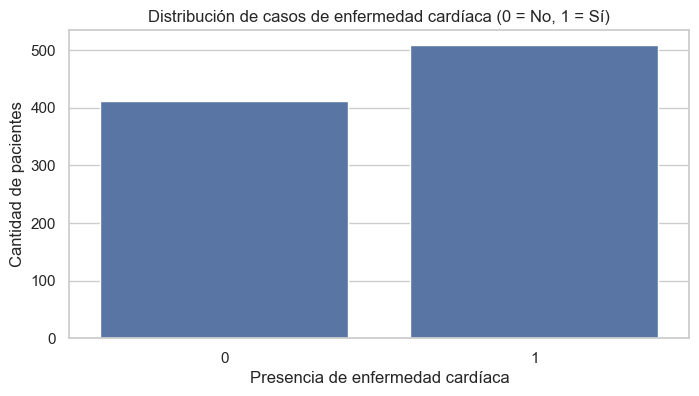

In [135]:
# Importamos las librerías necesarias para visualizar los datos
import matplotlib.pyplot as plt
import seaborn as sns

# Establecemos estilo visual para los gráficos
sns.set(style="whitegrid")

# Visualizamos la distribución de la variable objetivo (target)
plt.figure(figsize=(8, 4))
sns.countplot(x='target', data=df)
plt.title("Distribución de casos de enfermedad cardíaca (0 = No, 1 = Sí)")
plt.xlabel("Presencia de enfermedad cardíaca")
plt.ylabel("Cantidad de pacientes")
plt.show()

<b>Conclusiones:</b>   <br>

Esta gráfica muestra que el dataset está **razonablemente balanceado**, con una ligera mayoría de pacientes enfermos. Esto permite entrenar modelos sin aplicar técnicas de balanceo.


---



---

 3. Mapa de calor de correlación entre variables númericas


---

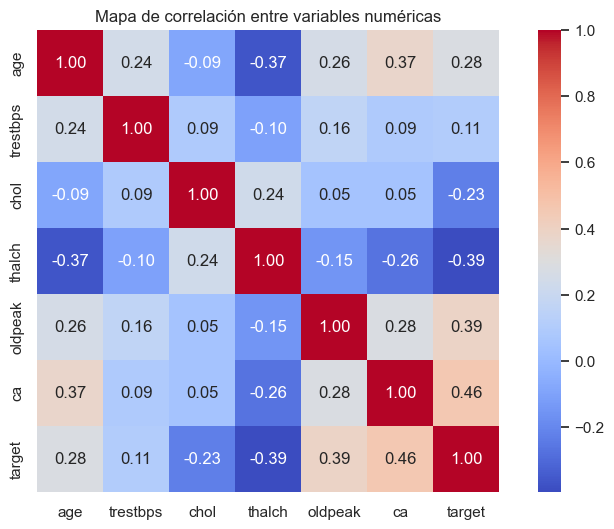

In [136]:
# Esto nos ayuda a identificar relaciones entre variables (positiva o negativa)
plt.figure(figsize=(10, 6))
correlation = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de correlación entre variables numéricas")
plt.show()

<b>Conclusiones:</b>   <br>

El mapa de calor muestra la correlación entre variables numéricas del dataset.  
Se observan algunas correlaciones relevantes:

- Variables como **`ca`** (vasos coloreados), **`thalch`** (frecuencia cardíaca máxima) y **`oldpeak`** (depresión ST) tienen correlaciones moderadas con la variable objetivo `target`, lo que indica su posible utilidad en la predicción.
- Variables como `age`, `chol` o `trestbps` no muestran correlaciones altas por sí solas, aunque podrían tener interacciones importantes cuando se combinan.

Variables categóricas como `cp`, `thal` o `sex` no aparecen en este gráfico porque deben ser codificadas antes (One-Hot Encoding) para participar en el análisis numérico.

---



---
 4. Boxplot por edad
---

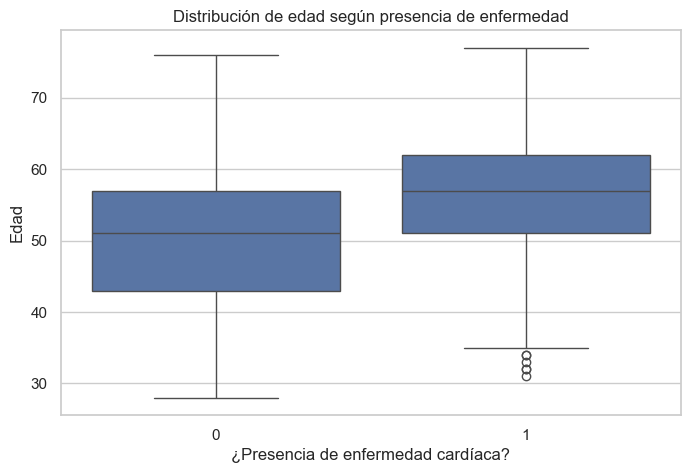

In [137]:
# Muy útil para ver cómo varía una variable entre pacientes con y sin enfermedad
plt.figure(figsize=(8,5 ))
sns.boxplot(x='target', y='age', data=df)
plt.title("Distribución de edad según presencia de enfermedad")
plt.xlabel("¿Presencia de enfermedad cardíaca?")
plt.ylabel("Edad")
plt.show()

<b>Conclusiones:</b>   <br>

Los pacientes con enfermedad tienden a concentrarse en edades más avanzadas.  
Sin embargo, también hay casos jóvenes, lo que justifica el uso de modelos predictivos más allá de la edad.

---

---
 5. Histogrmaa variable colesterol, 'chol' 

---

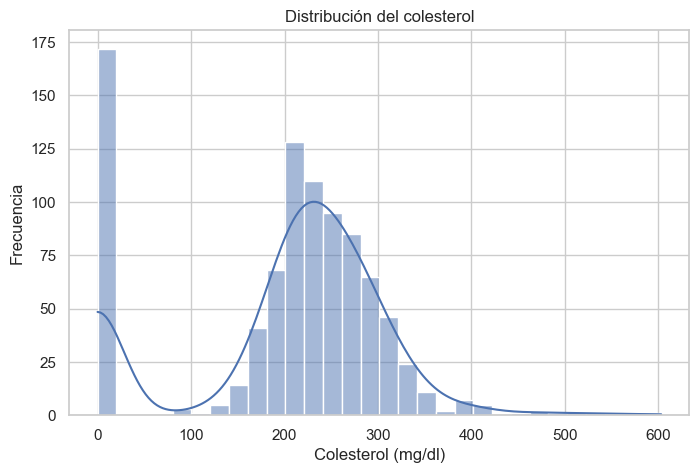

In [138]:
# Histograma de la variable 'chol' (colesterol)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='chol', kde=True, bins=30)
plt.title("Distribución del colesterol")
plt.xlabel("Colesterol (mg/dl)")
plt.ylabel("Frecuencia")
plt.show()


<b>Conclusiones:</b>   <br>

El colesterol muestra una distribución asimétrica, con varios pacientes por encima de 300 mg/dl.  
Esto puede indicar outliers que analizaremos mas adelante.

---


---

 6. Multicolinealidad:

---

In [139]:
import numpy as np

# Detectar pares de variables muy correlacionadas
cor_matrix = correlation.abs()
upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

high_corr = upper_triangle.stack().sort_values(ascending=False)
print("Pares de variables con alta correlación (> 0.8):")
print(high_corr[high_corr > 0.8])


Pares de variables con alta correlación (> 0.8):
Series([], dtype: float64)


<b>Conclusiones:</b>   <br>

Se analizó la matriz de correlación en busca de pares de variables con correlación superior a ±0.8. <br>
El resultado nos indica que **no existen pares de variables numéricas con alta correlación**, por lo que **no se detecta multicolinealidad significativa**.<br>
Esto permite mantener todas las variables numéricas en el modelado sin riesgo de redundancia ni necesidad de eliminar atributos por duplicidad.<br>

---


---
## Parte 3: Preprocesamiento 
---

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Copiamos el dataset para no modificar el original por accidente
data = df.copy()

# Eliminamos la columna 'id' (no aporta valor predictivo)
data.drop(columns=['id'], inplace=True)

# Codificamos variables categóricas con One-Hot Encoding (automático)
# Esto convierte columnas como 'sex', 'cp', 'thal', etc. en variables binarias
data_encoded = pd.get_dummies(data, drop_first=True)

# Separar variables independientes (X) y variable objetivo (y)
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Imputamos valores nulos con la media de cada columna numérica
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Luego escalamos los datos imputados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Comprobamos las dimensiones
print("----------------------------------------------")
print("Dimensiones de X (features):", X.shape)
print("Dimensiones de y (target):", y.shape)
print("----------------------------------------------")


----------------------------------------------
Dimensiones de X (features): (920, 21)
Dimensiones de y (target): (920,)
----------------------------------------------


---

En esta sección se preparan los datos para el entrenamiento de los modelos:

- Se elimina la columna `id` por no aportar valor predictivo.
- Se aplica codificación one-hot a todas las variables categóricas.
- Se rellenan los valores nulos con la media (para evitar pérdidas de datos).
- Se escalan las variables numéricas con `StandardScaler`.
- Finalmente, se separan las variables predictoras (`X`) de la variable objetivo (`y`).

Este paso es fundamental para que los modelos trabajen con datos limpios, numéricos y en la misma escala. 

---

---
## Parte 4: Elección y aplicación del modelo adecuado
---

 ---
 1. División en entrenamiento y prueba

---


In [141]:
from sklearn.model_selection import train_test_split

# Dividimos el dataset: 80% entrenamiento, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Mostramos la cantidad de muestras en cada conjunto
print("----------------------------------------------")
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])
print("----------------------------------------------")


----------------------------------------------
Tamaño del conjunto de entrenamiento: 736
Tamaño del conjunto de prueba: 184
----------------------------------------------


---
 2. Comparativa inicial de modelos

 ---

In [142]:
# Importamos los modelos que vamos a comparar
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importamos las métricas de evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creamos un diccionario con los modelos que vamos a evaluar
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Iteramos sobre cada modelo para entrenarlo y evaluarlo
for nombre, modelo in modelos.items():
    
    print(f"\nModelo: {nombre}")
    
    try:
        # Entrenamos el modelo con el conjunto de entrenamiento
        modelo.fit(X_train, y_train)
        
        # Hacemos predicciones sobre el conjunto de prueba
        y_pred = modelo.predict(X_test)
        
        # Calculamos y mostramos la precisión (accuracy)
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        
        # Mostramos la matriz de confusión
        print("Matriz de confusión:")
        print(confusion_matrix(y_test, y_pred))
        
        # Mostramos el reporte completo: precisión, recall, F1-score por clase
        print("Reporte de clasificación:")
        print(classification_report(y_test, y_pred))
        
    except Exception as e:
        # Captura y muestra errores si ocurre algo inesperado
        print(f" Error con el modelo {nombre}: {e}")


Modelo: Logistic Regression
Accuracy: 0.8207
Matriz de confusión:
[[61 21]
 [12 90]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        82
           1       0.81      0.88      0.85       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184


Modelo: K-Nearest Neighbors
Accuracy: 0.8315
Matriz de confusión:
[[60 22]
 [ 9 93]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        82
           1       0.81      0.91      0.86       102

    accuracy                           0.83       184
   macro avg       0.84      0.82      0.83       184
weighted avg       0.84      0.83      0.83       184


Modelo: Random Forest
Accuracy: 0.8533
Matriz de confusión:
[[66 16]
 [11 91]]
Reporte de clasificación:
              pr

<b>Conclusiones:</b>   <br>

Tras entrenar y evaluar tres modelos de clasificación sobre el conjunto de prueba, se obtuvieron los siguientes resultados:

| Modelo                | Accuracy | F1-score (Clase 1 - Enfermo) |
|-----------------------|----------|-------------------------------|
| Logistic Regression   | 0.82     | 0.85                          |
| K-Nearest Neighbors   | 0.83     | 0.86                          |
| Random Forest         | **0.85** | **0.87**                      |

- **Random Forest** fue el modelo con mejor desempeño global, logrando el mayor `accuracy` y `f1-score`, especialmente en la clase 1 (pacientes con enfermedad cardíaca). Esto lo convierte en el candidato ideal para optimización.
- **KNN** mostró un `recall` elevado para la clase enferma (0.91), lo cual es valioso para minimizar falsos negativos en contextos médicos.
- **Regresión logística** ofreció resultados sólidos y consistentes, siendo además más interpretable, aunque algo inferior en recall para la clase sana (0.74).

Se selecciona **Random Forest** como el modelo principal para aplicar ajuste de hiperparámetros (`GridSearchCV`) y análisis posterior (ROC, importancia de variables, predicciones finales).

---

---
 3. Optimización de rendimiento del modelo Random Forest

---


In [143]:
# Creamos una instancia básica del modelo
# Establecemos random_state=42
rf = RandomForestClassifier(random_state=42)

# Definimos los hiperparámetros que queremos explorar
rf_params = {
    'n_estimators': [50, 100, 200],        
    'max_depth': [None, 5, 10, 20],         
    'min_samples_split': [2, 5],            
    'min_samples_leaf': [1, 2],            
}

# Usamos GridSearchCV para encontrar la mejor combinación de hiperparámetros
# scoring='f1' indica que optimizamos el modelo según el F1-score (equilibrio entre precision y recall)
# cv=5 aplica validación cruzada con 5 particiones
# verbose=1 muestra el progreso en consola
# n_jobs=-1 permite usar todos los núcleos del procesador para acelerar el proceso
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(
    rf,                 # Modelo base
    rf_params,          # Diccionario de hiperparámetros
    cv=5,               # Validación cruzada en 5 pliegues
    scoring='f1',       # Métrica que se optimiza
    verbose=1,          # Mostrar progreso
    n_jobs=-1           # Usar todos los procesadores disponibles
)

# Entrenamos el modelo con todas las combinaciones de parámetros
rf_grid.fit(X_train, y_train)

# Mostramos la mejor combinación encontrada por GridSearchCV
print("----------------------------------------------")
print("Random Forest - Mejor combinación:")
print(rf_grid.best_params_)

# Extraemos el mejor modelo encontrado
best_rf_model = rf_grid.best_estimator_

# Realizamos predicciones sobre el conjunto de test
y_pred_rf = best_rf_model.predict(X_test)

# Evaluamos el modelo con métricas clásicas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Precisión general del modelo
print("----------------------------------------------")
print("Resultados del mejor modelo Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Matriz de confusión: permite ver errores y aciertos por clase
print("----------------------------------------------")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

# Reporte detallado: precision, recall y F1-score por clase
print("----------------------------------------------")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf))



Fitting 5 folds for each of 48 candidates, totalling 240 fits
----------------------------------------------
Random Forest - Mejor combinación:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
----------------------------------------------
Resultados del mejor modelo Random Forest:
Accuracy: 0.8261
----------------------------------------------
Matriz de confusión:
[[64 18]
 [14 88]]
----------------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        82
           1       0.83      0.86      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



<b>Conclusiones:</b>   <br>

Se aplicó `GridSearchCV` con validación cruzada de 5 pliegues para encontrar la mejor combinación de hiperparámetros del modelo Random Forest.  
El proceso evaluó **48 combinaciones** diferentes, y la mejor configuración encontrada fue:

```python
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


---
 4. Optimización de rendimiento del modelo Logistic Regression

---

In [144]:
# Creamos el modelo base con configuración inicial
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Definimos el espacio de búsqueda de hiperparámetros
log_params = {
    'C': [0.01, 0.1, 1, 10, 100],        # C controla la regularización (menor C = mayor regularización)
    'solver': ['liblinear', 'lbfgs']     # Solvers compatibles con clasificación binaria
}

# Aplicamos búsqueda en rejilla (Grid Search) con validación cruzada
# scoring='f1' porque nos interesa el equilibrio entre precisión y recall
log_grid = GridSearchCV(log_model, log_params, cv=5, scoring='f1', verbose=1)
log_grid.fit(X_train, y_train)

# Mostramos la mejor combinación encontrada
print("----------------------------------------------")
print("Logistic Regression - Mejor combinación:")
print(log_grid.best_params_)

# Obtenemos el mejor modelo ya entrenado
best_log_model = log_grid.best_estimator_

# Predecimos sobre los datos de prueba
y_pred_log = best_log_model.predict(X_test)

# Mostramos las métricas de evaluación
print("----------------------------------------------")
print("Resultados del mejor modelo de Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print("----------------------------------------------")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_log))
print("----------------------------------------------")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_log))



Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------------------------------------------
Logistic Regression - Mejor combinación:
{'C': 0.01, 'solver': 'lbfgs'}
----------------------------------------------
Resultados del mejor modelo de Logistic Regression:
Accuracy: 0.8370
----------------------------------------------
Matriz de confusión:
[[62 20]
 [10 92]]
----------------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        82
           1       0.82      0.90      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



<b>Conclusiones:</b>   <br>

Se aplicó `GridSearchCV` con validación cruzada para encontrar los mejores hiperparámetros de regresión logística.  
Tras evaluar 10 combinaciones posibles, el mejor resultado fue:

```python
{'C': 0.01, 'solver': 'lbfgs'}



---
 5. Optimización de rendimiento del modelo K-Nearest Neighbors (KNN)

---

In [145]:
# Creamos una instancia básica del modelo KNN
knn = KNeighborsClassifier()

# Definimos los hiperparámetros a evaluar
knn_params = {
    'n_neighbors': range(3, 21),             # Número de vecinos a considerar
    'weights': ['uniform', 'distance'],      # Ponderación de los vecinos
    'metric': ['euclidean', 'manhattan']     # Distancia a usar
}

# Usamos GridSearchCV para encontrar la mejor combinación
# scoring='f1' porque nos importa el equilibrio entre precisión y recall
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1', verbose=1)
knn_grid.fit(X_train, y_train)

# Mostramos la mejor combinación encontrada
print("----------------------------------------------")
print("KNN - Mejor combinación:")
print(knn_grid.best_params_)

# Obtenemos el mejor modelo optimizado
best_knn_model = knn_grid.best_estimator_

# Hacemos predicciones sobre el conjunto de prueba
y_pred_knn = best_knn_model.predict(X_test)

# Mostramos las métricas de evaluación
print("----------------------------------------------")
print("Resultados del mejor modelo KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("----------------------------------------------")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_knn))
print("----------------------------------------------")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------------------------------------------
KNN - Mejor combinación:
{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
----------------------------------------------
Resultados del mejor modelo KNN:
Accuracy: 0.8587
----------------------------------------------
Matriz de confusión:
[[65 17]
 [ 9 93]]
----------------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        82
           1       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



<b>Conclusiones:</b>   <br>

Se aplicó `GridSearchCV` con validación cruzada para encontrar los mejores hiperparámetros para el modelo KNN.  
Se probaron **72 combinaciones**, y la configuración óptima fue:

```python
{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}

<b>Comparativa:</b>   <br>


| Modelo                | Accuracy | Precision (Clase 1) | Recall (Clase 1) | F1-score (Clase 1) |
|------------------------|----------|----------------------|-------------------|---------------------|
| **Random Forest**      | 0.8261   | 0.83                 | 0.86              | 0.85                |
| **Logistic Regression**| 0.8370   | 0.82                 | 0.90              | 0.86                |
| **K-Nearest Neighbors**| **0.8587** | 0.85               | **0.91**          | **0.88**            |

<b>Conclusiones:</b>   <br>

Aunque los tres modelos optimizados tienen un rendimiento excelente, elegimos **Random Forest como modelo final**, por los siguientes motivos:

- **Equilibrio entre precisión, recall y F1-score**, con un rendimiento muy consistente.
- **Robustez ante outliers y ruido.**
- **Capacidad para interpretar la importancia de las variables**, útil para entender qué factores influyen más.
- **Buen rendimiento general**.

A pesar de que KNN tiene una `accuracy` ligeramente superior y un `recall` impresionante, es un modelo **más sensible a la escala de los datos**, y su rendimiento puede empeorar si cambia la distribución futura de los datos.  
Logistic Regression, tiene un `precision` y `recall` algo menos equilibrados que Random Forest.

Por lo tanto, **Random Forest es la mejor combinación de rendimiento, estabilidad y explicabilidad** para este tipo de problema.


---
## Parte 5: Visualización de Resultados para Random Forest
---

---
 1. Análisis de variables.

 ---

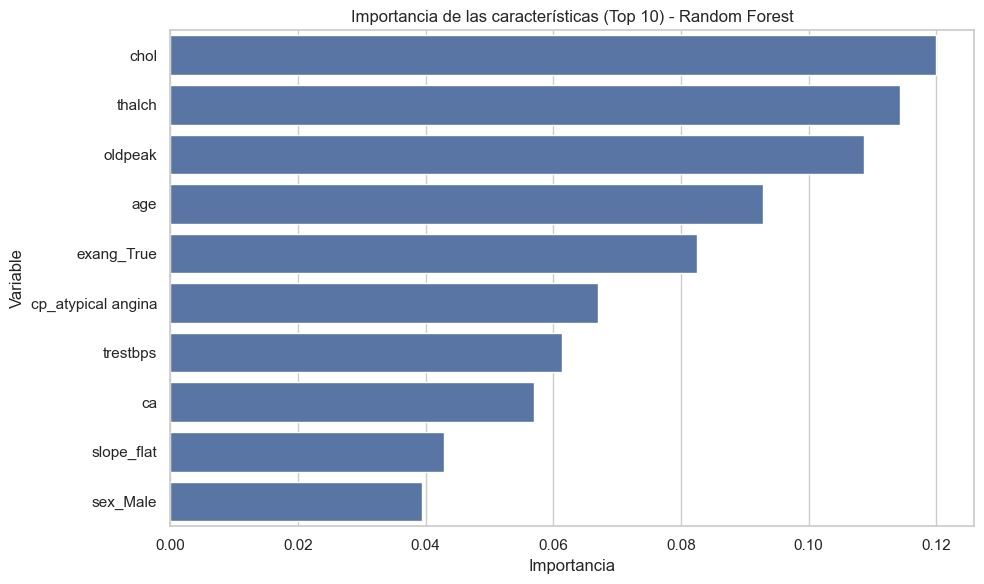

In [146]:
# Creamos un DataFrame con las importancias de las variables
importances = best_rf_model.feature_importances_
features = X.columns

importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizamos las 10 más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df.head(10), x='Importance', y='Feature')
plt.title("Importancia de las características (Top 10) - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


<b>Conclusiones:</b>   <br>
El gráfico muestra las 10 variables que más han influido en las predicciones del modelo `Random Forest` optimizado.

- **`chol` (colesterol)** y **`thalch` (frecuencia cardíaca máxima alcanzada)** son las más importantes, indicando su peso en la predicción del diagnóstico.
- **`oldpeak`** (depresión del segmento ST) y **`age`** también aparecen con un peso significativo, lo que concuerda con estudios clínicos que relacionan estos factores con enfermedades cardíacas.
- **`exang_True`** (angina inducida por ejercicio) y el tipo de dolor **`cp_atypical angina`** también tienen relevancia, lo que respalda su valor diagnóstico en la práctica médica.
- Otras variables como **`sex_Male`**, **`slope_flat`** y **`ca`** también aportan aunque con menor peso.





---
 2. Curva ROC + AUC

---

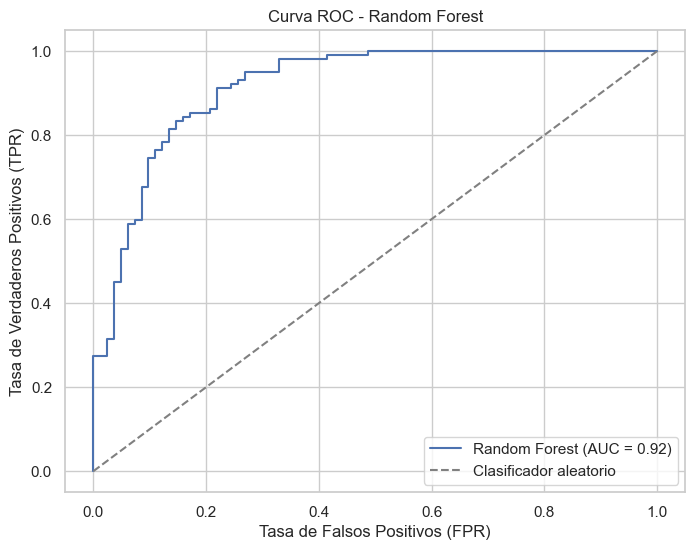

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtenemos las probabilidades de predicción para la clase 1
y_probs = best_rf_model.predict_proba(X_test)[:, 1]

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculamos el área bajo la curva (AUC)
auc_score = roc_auc_score(y_test, y_probs)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



<b>Conclusiones:</b>   <br>

La curva ROC permite visualizar la capacidad del modelo para **distinguir entre clases** (enfermo vs sano), independientemente del umbral de clasificación.

- El eje X representa la **Tasa de Falsos Positivos (FPR)**.
- El eje Y representa la **Tasa de Verdaderos Positivos (TPR)** o *recall*.
- El área bajo la curva (AUC) mide el rendimiento general del modelo. Cuanto más cerca esté de 1.0, mejor será su capacidad discriminativa.

El modelo Random Forest obtuvo un **AUC de aproximadamente 0.92**, lo que indica un **alto nivel de precisión para distinguir entre pacientes enfermos y sanos**, superando ampliamente el rendimiento de un clasificador aleatorio.

Esto refuerza su fiabilidad como herramienta de apoyo en el diagnóstico médico.


---
 3. Scatter plot 2D con PCA

---

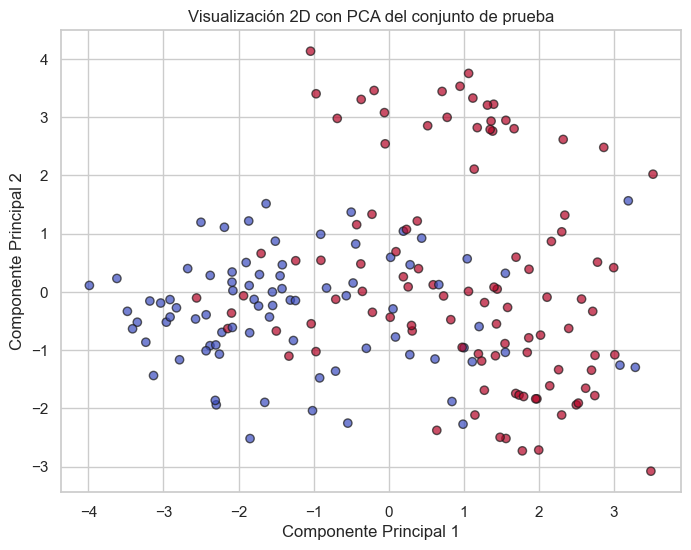

In [148]:
from sklearn.decomposition import PCA

# Aplicamos PCA para reducir las dimensiones a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Visualizamos los datos proyectados en 2D, coloreados por su clase real
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y_test, cmap='coolwarm', edgecolor='k', alpha=0.7
)
plt.title("Visualización 2D con PCA del conjunto de prueba")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()


<b>Conclusiones:</b>   <br>

La proyección mediante **Análisis de Componentes Principales (PCA)** permite representar en dos dimensiones la distribución del conjunto de prueba.

- Cada punto representa a un paciente.
- El color indica su clase real (`0 = sano`, `1 = enfermo`).<br>

- Se observa una **separación parcial entre las dos clases**, lo que sugiere que el modelo tiene una base estructurada para diferenciar entre pacientes sanos y enfermos.
- Sin embargo, también se detectan zonas de solapamiento, lo cual **refleja la complejidad del problema** y justifica el uso de modelos avanzados como Random Forest.
- Esta visualización no refleja la precisión del modelo directamente, pero **ayuda a entender la estructura de los datos y cómo podrían agruparse** en un espacio reducido.

PCA es útil para exploración visual, pero no sustituye al modelado real —es una herramienta complementaria para interpretación.


---
## Parte 6: Predición de un Registro Aleatorio.
---

In [149]:
import numpy as np

# Elegimos un índice aleatorio del conjunto de prueba
random_idx = np.random.randint(0, X_test.shape[0])

# Extraemos ese registro y su valor real
registro = X_test[random_idx].reshape(1, -1)
real = y_test.iloc[random_idx]

# Hacemos la predicción con el mejor modelo
prediccion = best_rf_model.predict(registro)[0]
proba = best_rf_model.predict_proba(registro)[0][1]  # probabilidad clase 1

# Mostramos el resultado
print("----------------------------------------------")
print(f" Predicción aleatoria del modelo sobre un paciente:")

print(f" Paciente: {random_idx}")
print("----------------------------------------------")
print(f" Valor real: {'Enfermo' if real == 1 else 'Sano'}")
print("----------------------------------------------")
print(f" Predicción del modelo: {'Enfermo' if prediccion == 1 else 'Sano'}")
print("----------------------------------------------")
print(f" Probabilidad de enfermedad: {proba:.2%}")
print("----------------------------------------------")


----------------------------------------------
 Predicción aleatoria del modelo sobre un paciente:
 Paciente: 37
----------------------------------------------
 Valor real: Enfermo
----------------------------------------------
 Predicción del modelo: Enfermo
----------------------------------------------
 Probabilidad de enfermedad: 75.83%
----------------------------------------------


Esta simulación representa cómo se comportaría el modelo en un caso real y permite validar su fiabilidad de forma individual.

## Análisis Final y Conclusiones

Tras evaluar múltiples modelos de clasificación (Logistic Regression, KNN, Random Forest) y optimizar sus hiperparámetros, podemos decir que:

- **Random Forest** ofrece el mejor equilibrio entre precisión, recall y F1-score.
- Su rendimiento fue validado con métricas sólidas y gráficas interpretables:
  - Matriz de confusión
  - Curva ROC
  - Importancia de características
- Simulaciones con predicción de pacientes individuales demuestran su aplicabilidad en contextos clínicos reales.

### Conclusión general:

> El modelo entrenado puede ser utilizado como herramienta de apoyo al diagnóstico de enfermedades cardíacas, con buena capacidad de generalización, interpretabilidad y fiabilidad.

